# 3. 컨브넷 학습 시각화

* 컨브넷의 표현은 시각적인 개념을 학습한 것이기 때문에, 시각화하기 아주 좋다.


## 컨브넷 시각화 기법들

1. 컨브넷 중간층의 출력(중간층에 있는 활성화)을 시각화하기
    * 연속된 컨브넷 층이 입력을 어떻게 변형시키는지 이해하고, 개별적인 컨브넷 필터의 의미 파악에 도움이 됨
    * 앞에서 학습시킨 작은 컨브넷 모델을 사용할 것임


2. 컨브넷 필터를 시각화하기
    * 컨브넷의 필터가 찾으려는 시각적 패턴 및 개념을 상세하게 이해하는 데에 도움이 됨
    * VGG16 모델을 사용할 것임


3. 클래스 활성화에 대한 히트맵(heatmap)을 이미지에 시각화하기
    * 이미지의 어느 부분이 주어진 클래스에 속하는 데에 기여했는지 이해하고,
    * 이미지에서 객체 위치를 추정(localization)하는 데에 도움이 됨
    * VGG16 모델을 사용할 것임

## 1) 중간층의 활성화 시각화하기

* **어떤 입력이 주어졌을 때, 네트워크에 있는 여러 합성곱과 풀링 층이 출력하는(활성화하는) 특성 맵을 그리는 것**을 말한다.
* **너비, 높이, 깊이(채널) 3개의 차원에 대해 특성 맵을 시각화**하는 것이 좋다.
    * 각 채널은 비교적 독립적인 특성을 인코딩하므로, 특성 맵의 각 채널 내용을 독립적인 2D 이미지로 그리는 것이 괜찮은 방법이다.

In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("q



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
________________________

In [2]:
# 개별 이미지 전처리하기

img_path = './datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
print(img_tensor)
img_tensor = np.expand_dims(img_tensor, axis=0)  # 이미지를 4D 텐서로 변경
print('*********')
print(img_tensor)
img_tensor /= 255.

print(img_tensor.shape)

[[[164. 174. 186.]
  [161. 171. 183.]
  [159. 171. 185.]
  ...
  [198. 214. 240.]
  [200. 216. 242.]
  [200. 216. 242.]]

 [[160. 170. 182.]
  [157. 167. 179.]
  [156. 168. 182.]
  ...
  [199. 215. 241.]
  [201. 217. 243.]
  [201. 217. 243.]]

 [[161. 171. 183.]
  [159. 169. 181.]
  [158. 170. 184.]
  ...
  [199. 215. 241.]
  [199. 215. 241.]
  [199. 215. 241.]]

 ...

 [[ 66.  50.  53.]
  [ 54.  37.  43.]
  [ 31.  16.  23.]
  ...
  [214. 192. 179.]
  [194. 177. 149.]
  [193. 176. 148.]]

 [[ 69.  50.  52.]
  [ 58.  42.  45.]
  [ 45.  28.  36.]
  ...
  [218. 199. 185.]
  [210. 192. 168.]
  [199. 181. 157.]]

 [[ 62.  44.  42.]
  [ 56.  38.  38.]
  [ 43.  26.  32.]
  ...
  [210. 193. 175.]
  [209. 193. 170.]
  [197. 181. 158.]]]
*********
[[[[164. 174. 186.]
   [161. 171. 183.]
   [159. 171. 185.]
   ...
   [198. 214. 240.]
   [200. 216. 242.]
   [200. 216. 242.]]

  [[160. 170. 182.]
   [157. 167. 179.]
   [156. 168. 182.]
   ...
   [199. 215. 241.]
   [201. 217. 243.]
   [201. 217. 24

In [4]:
# 테스트 사진 출력하기

import matplotlib.pyplot as plt

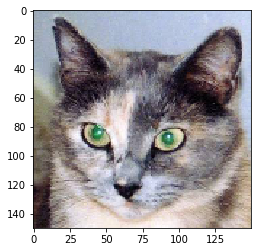

In [5]:
plt.imshow(img_tensor[0])
plt.show()

확인하고 싶은 특성 맵을 추출하기 위해,
* 이미지 배치를 입력으로 받아
* 모든 합성곱과 풀링 층의 활성화를 출력하는 케라스 모델을 만들 것임

=> 케라스의 Model 클래스를 사용할 것
* 2개의 매개변수(입력 텐서(의 리스트), 출력 텐서(의 리스트)) 필요
* 특정 입력과 특정 출력을 매핑하는 케라스 모델을 리턴
* Sequential과는 달리, 여러 개의 출력을 가진 모델을 만들 수 있음
    

In [6]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]  # 상위 8개 층의 출력을 추출
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)  # 입력에 대해 8개 층의 출력을 반환하는 모델

In [8]:
# 예측 모드로 모델 실행하기
# 층의 활성화마다 하나씩, 8개의 넘파이 배열로 이루어진 리스트를 반환

#      y        = activation_model.predict(x)
activations = activation_model.predict(img_tensor)

In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [10]:
import matplotlib.pyplot as plt

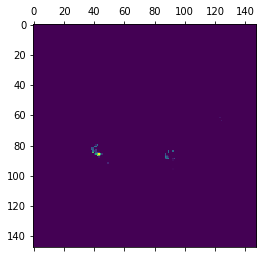

In [11]:
# 20번째 채널 시각화하기

plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

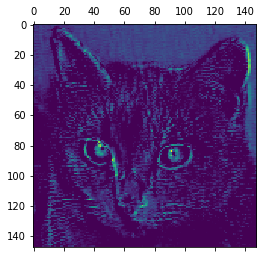

In [12]:
# 16번째 채널 시각화하기

plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


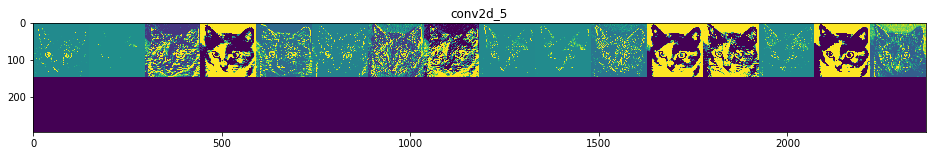

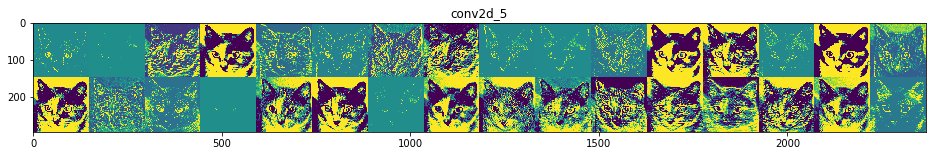

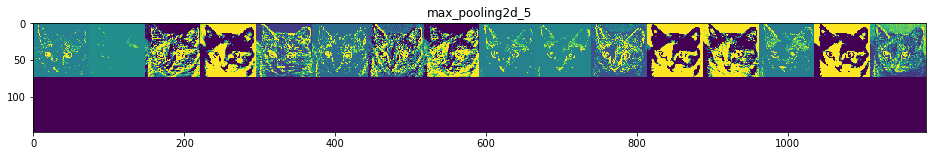

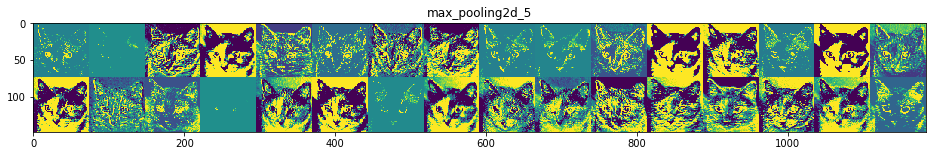

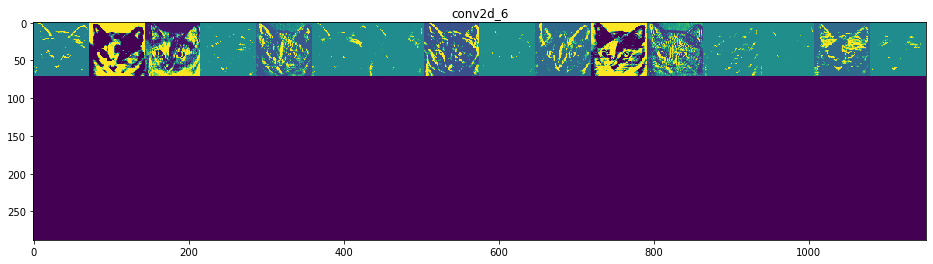

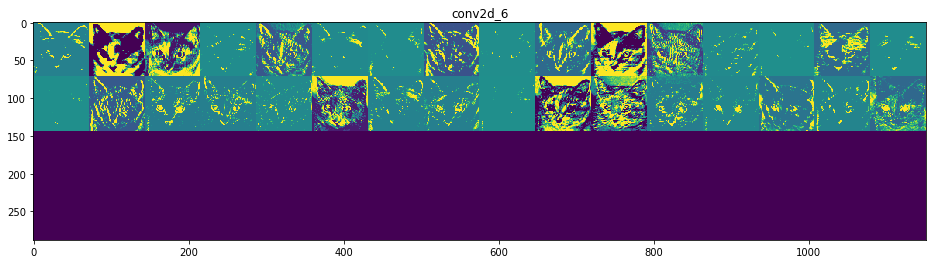

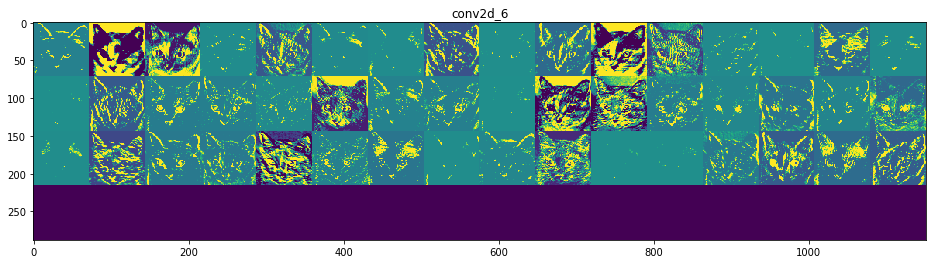

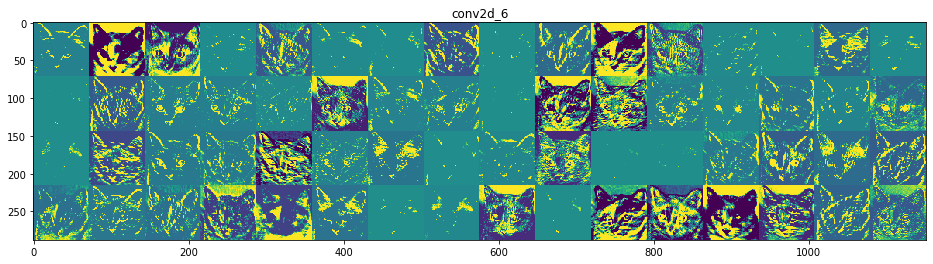

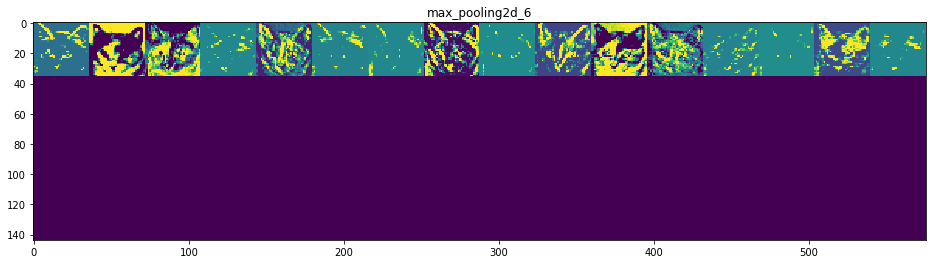

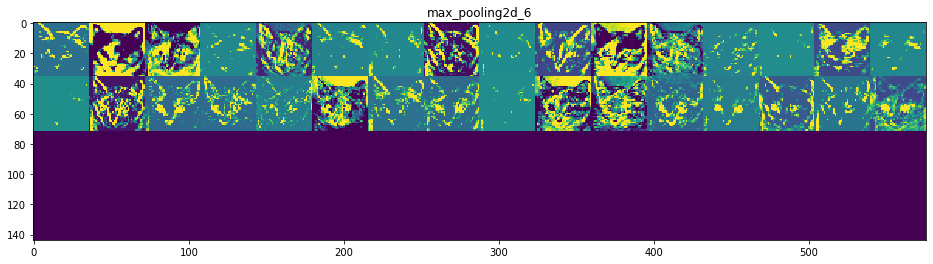

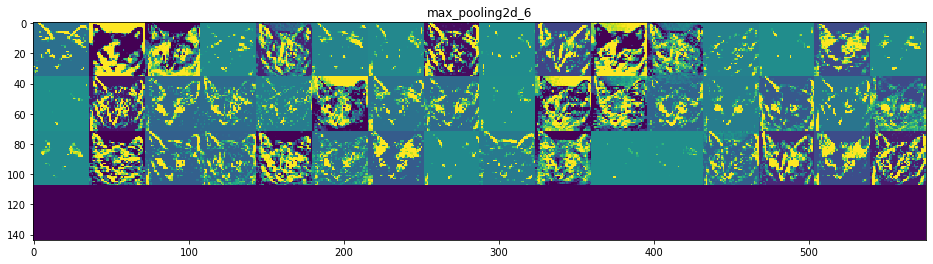

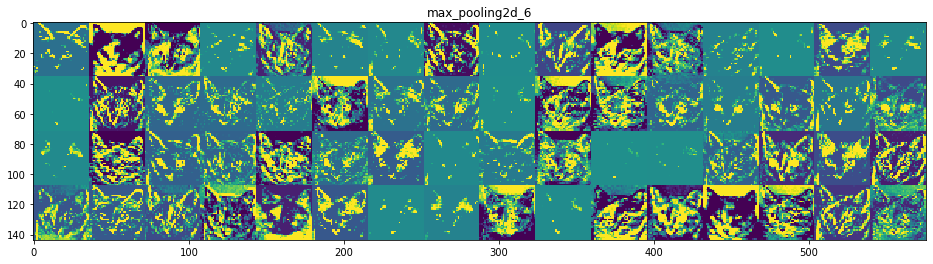

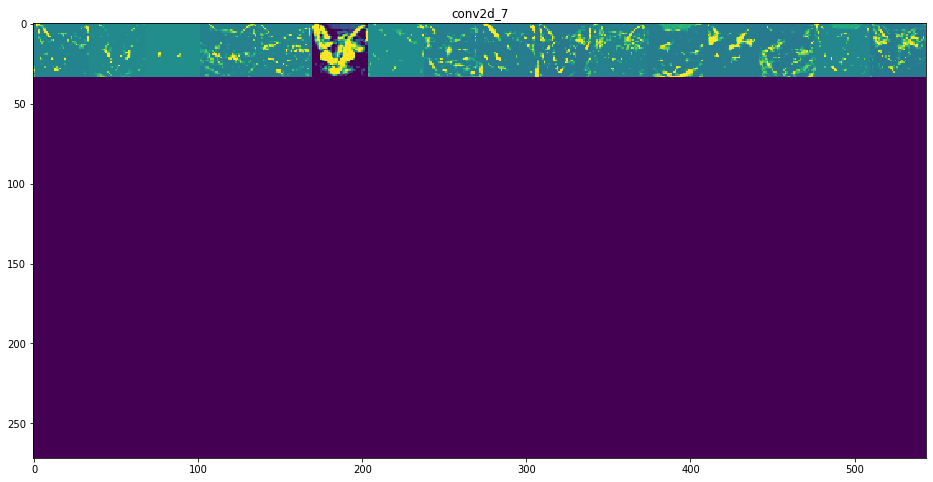

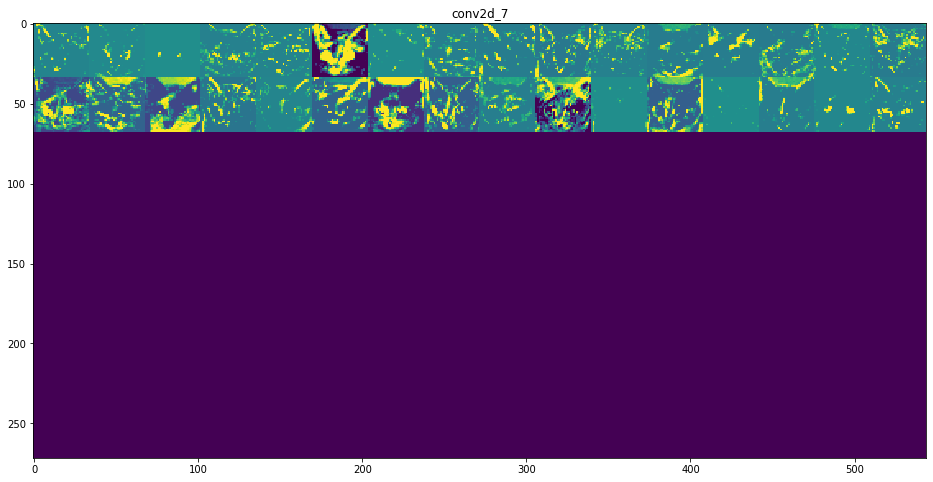

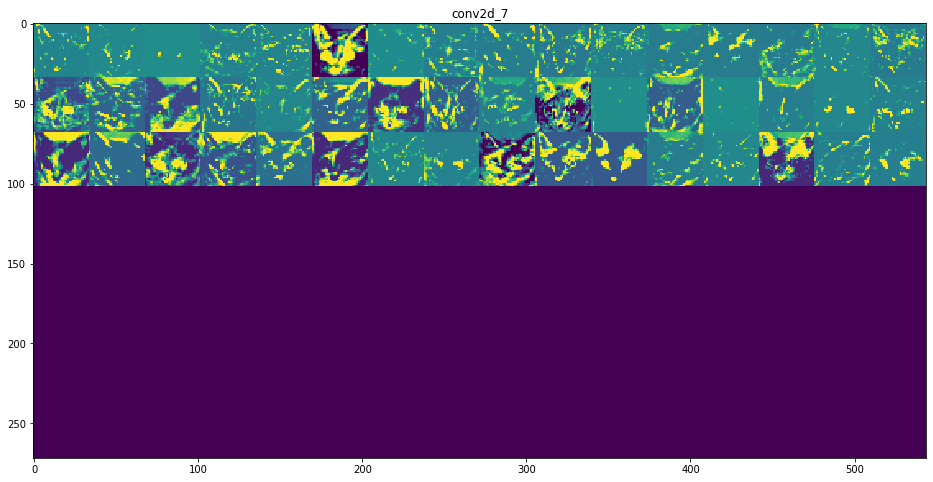

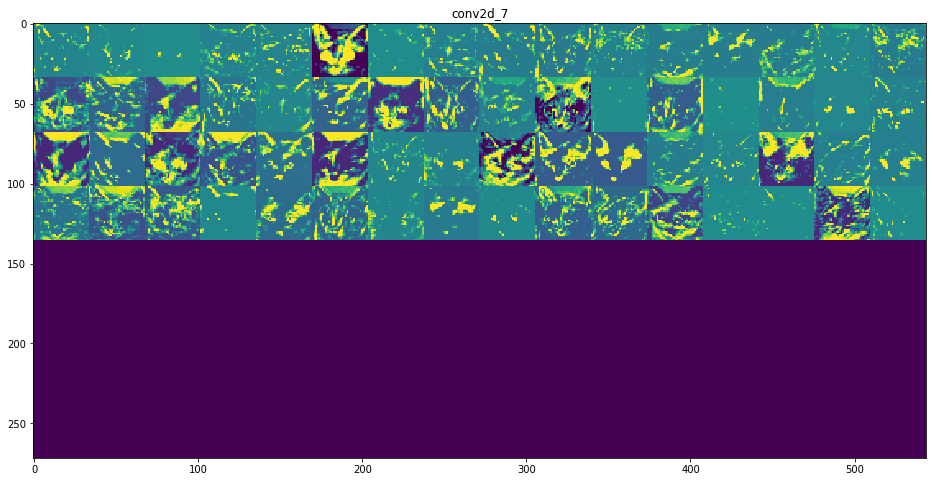

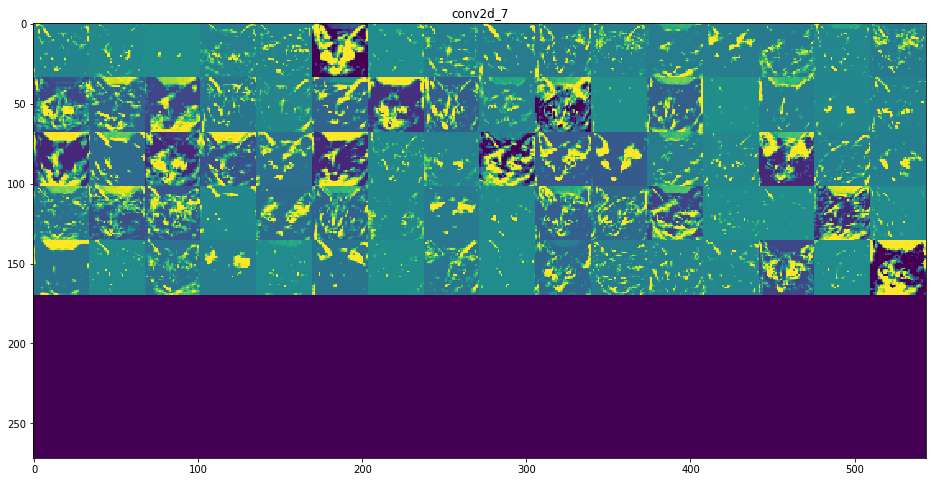

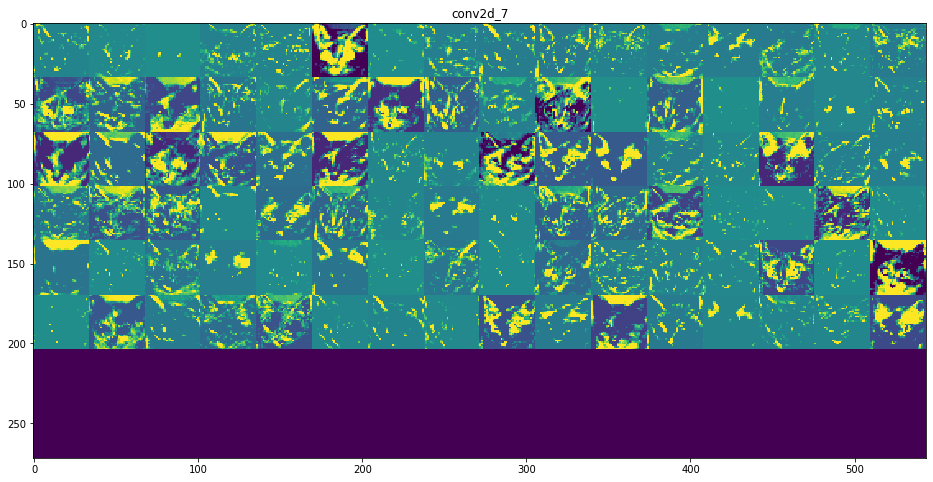

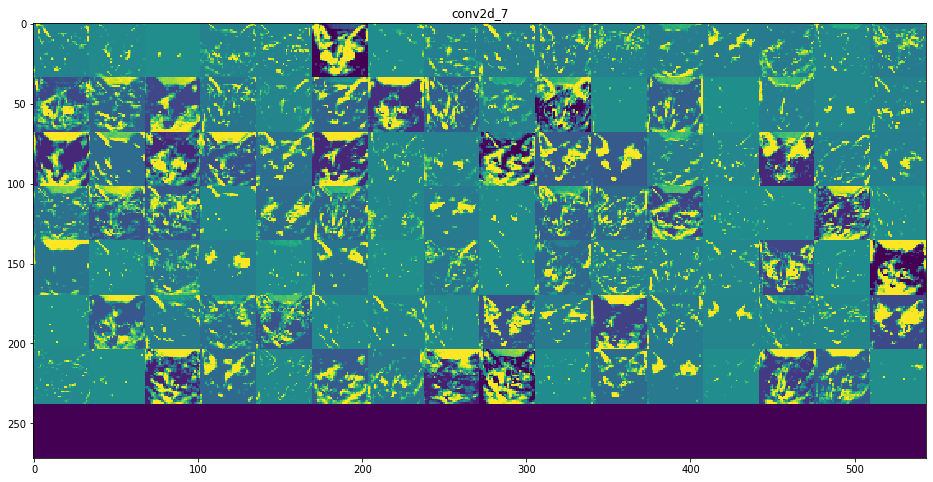

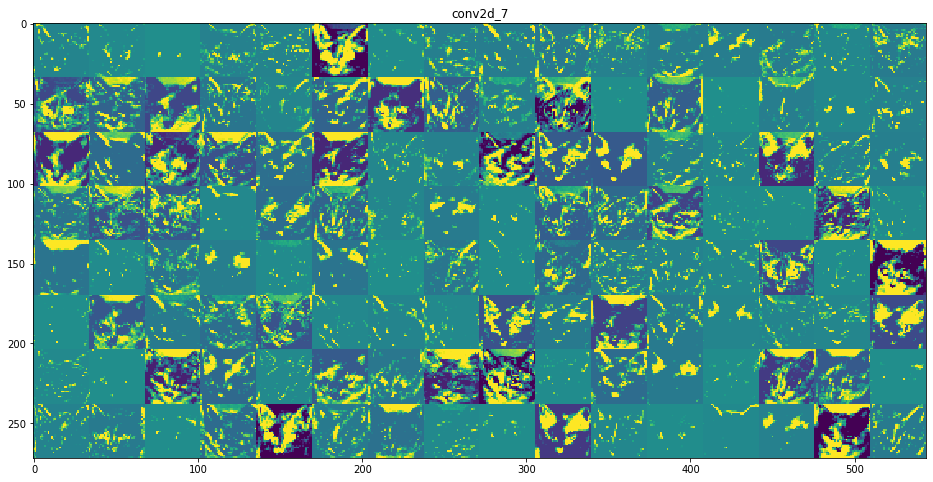

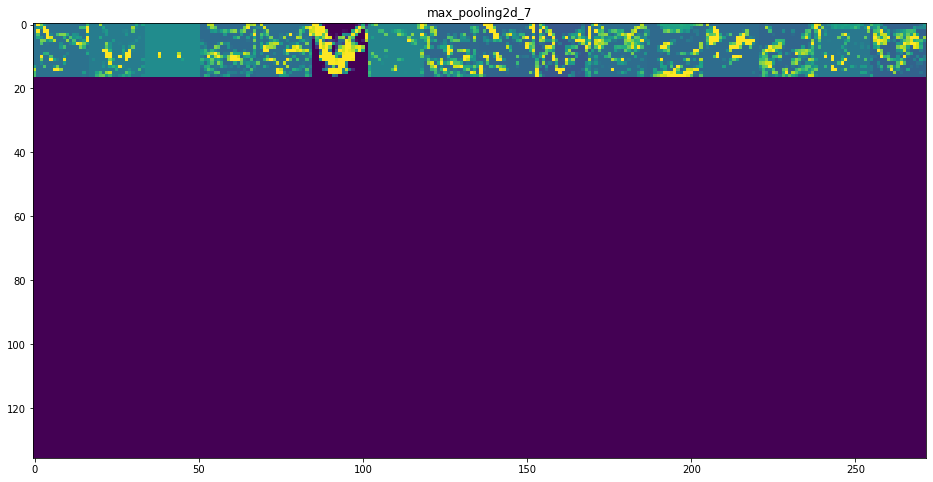

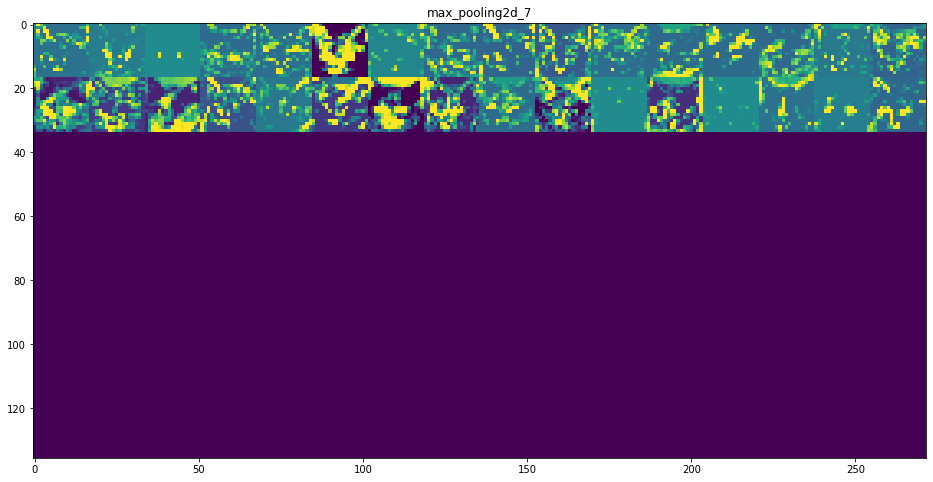

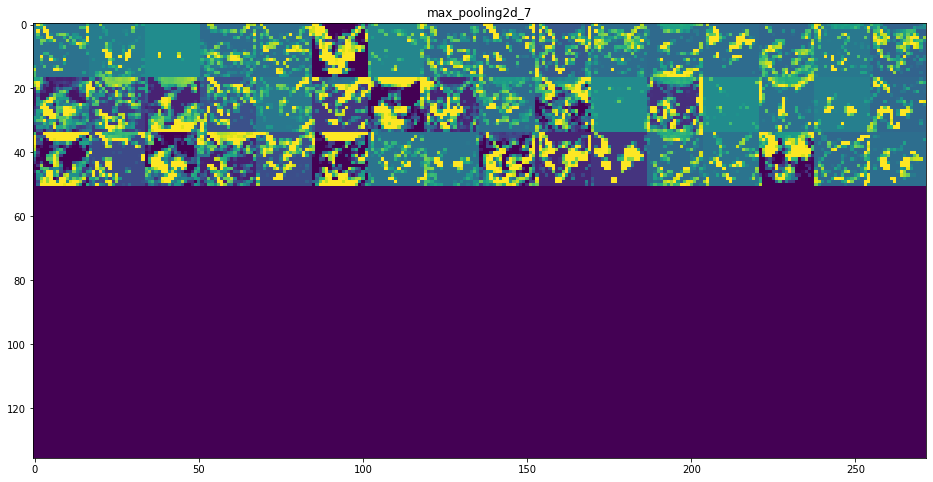

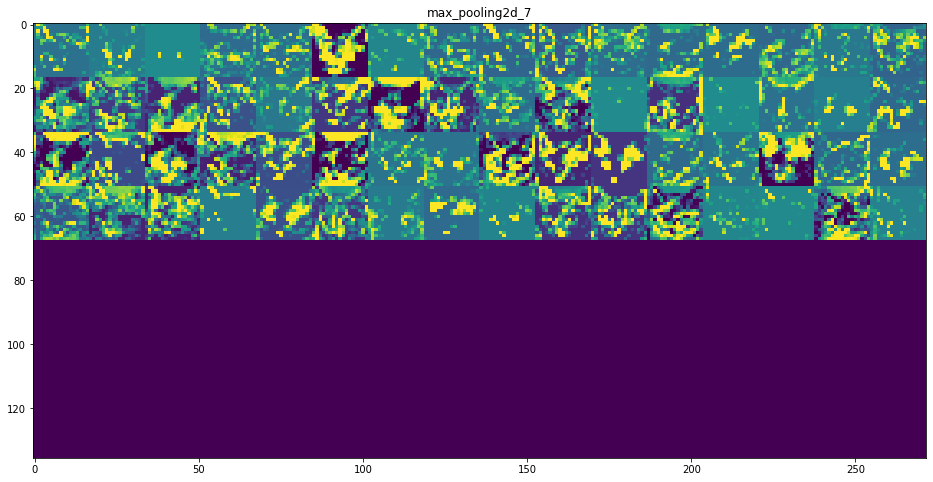

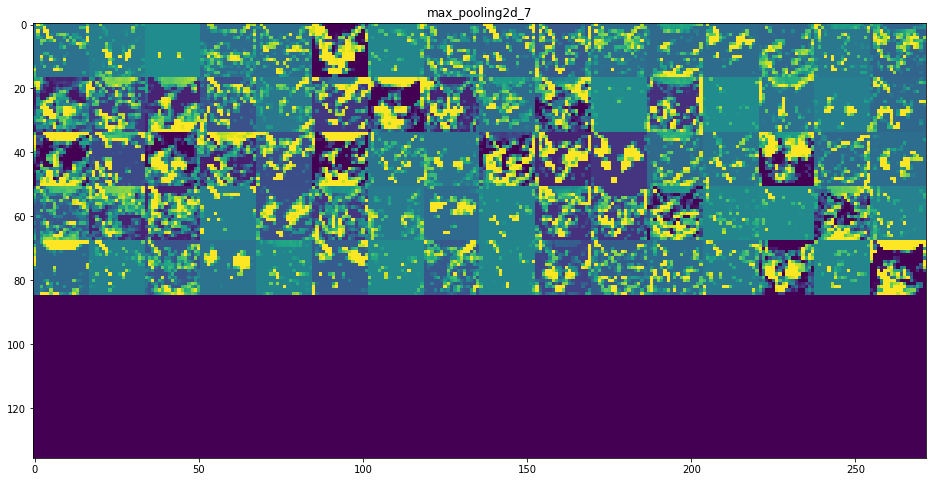

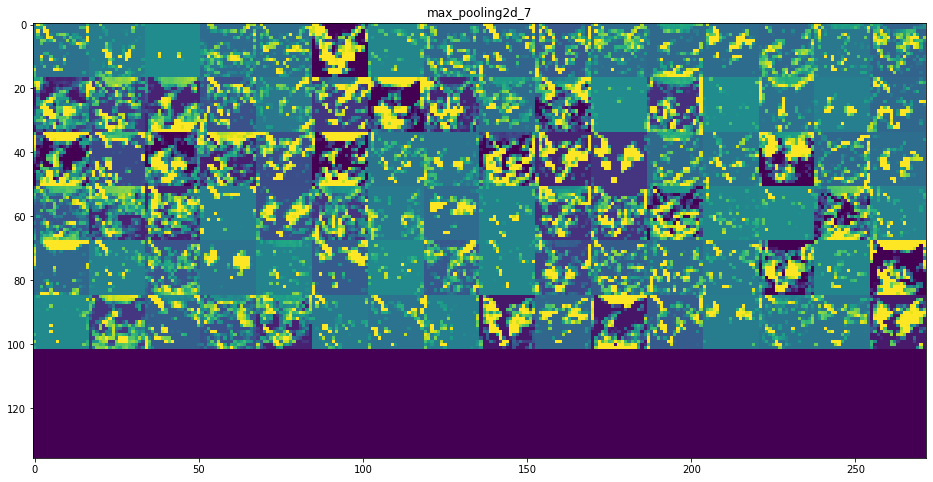

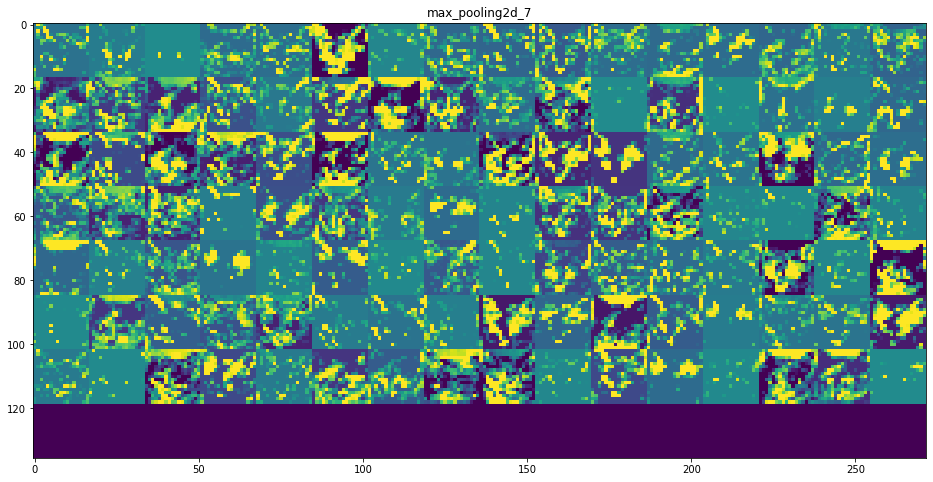

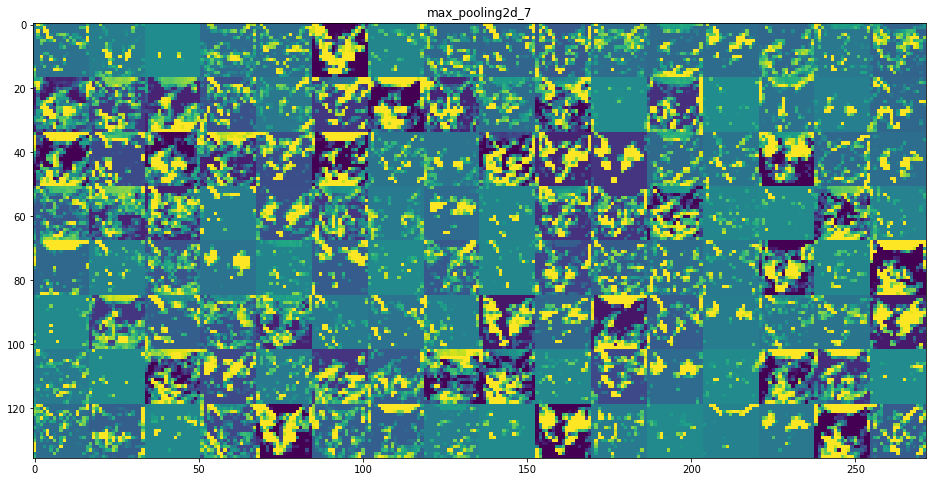

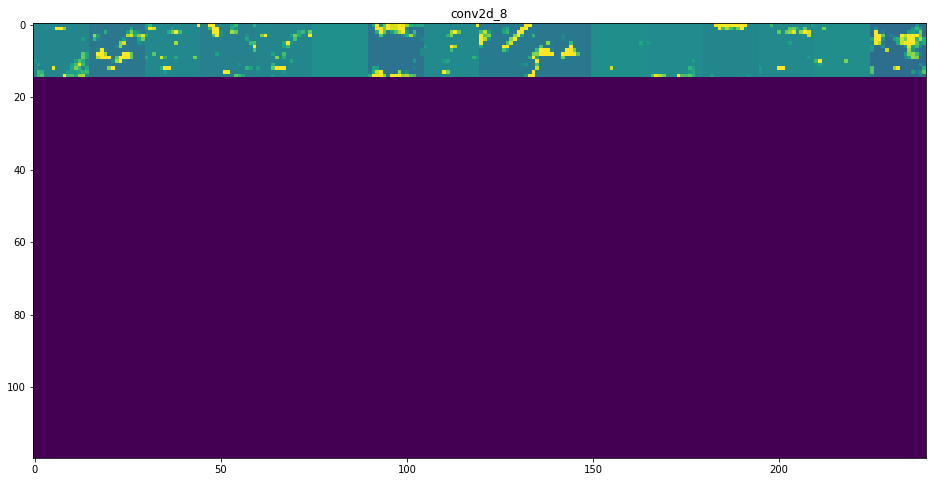

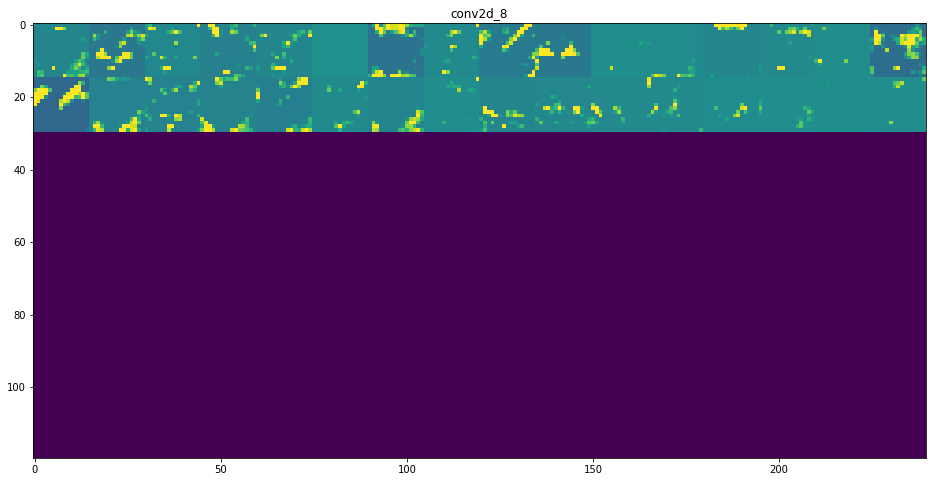

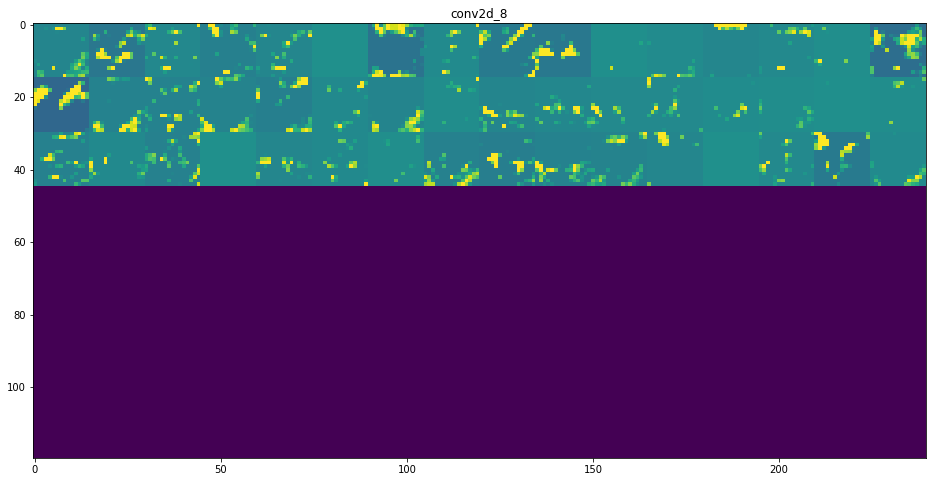

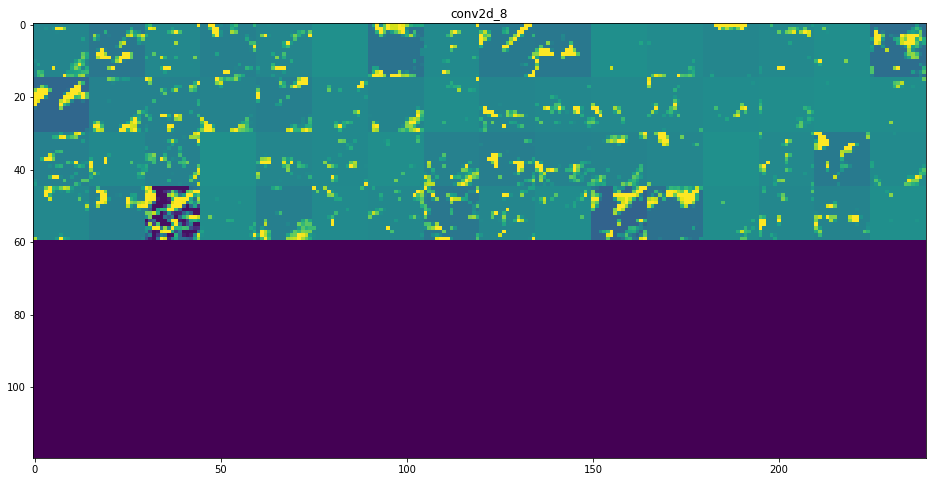

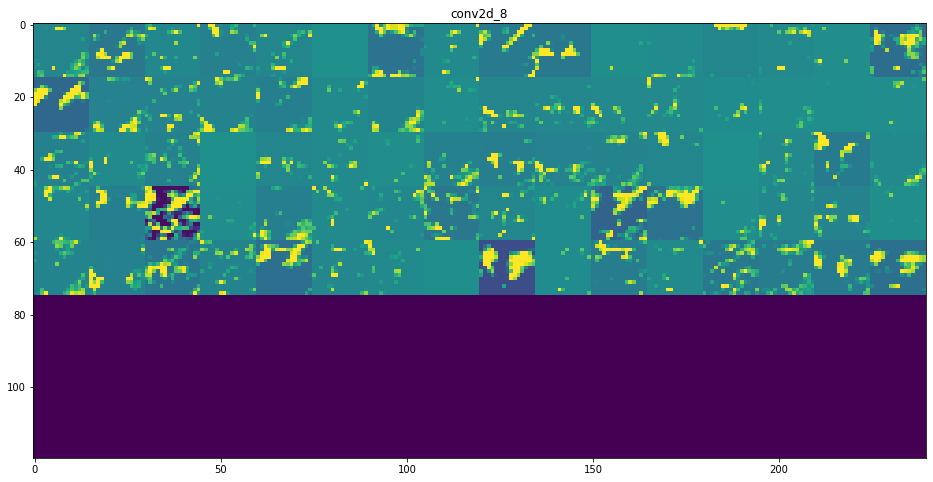

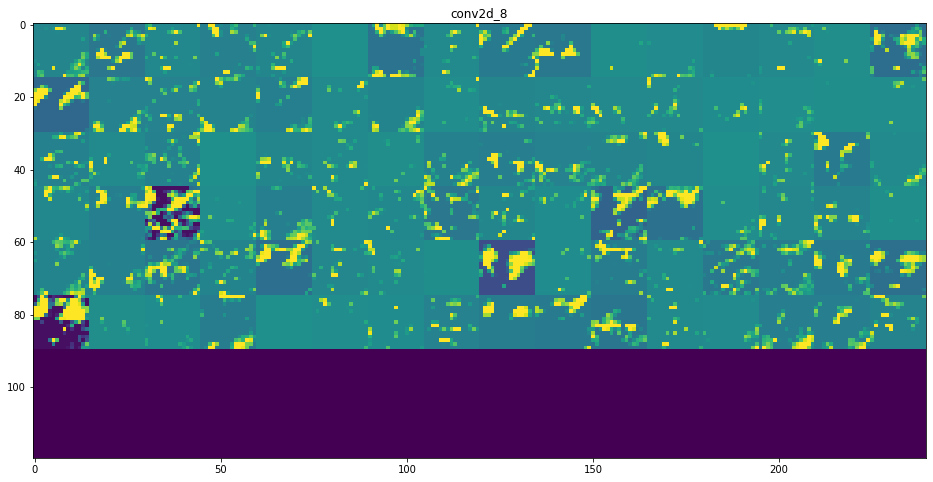

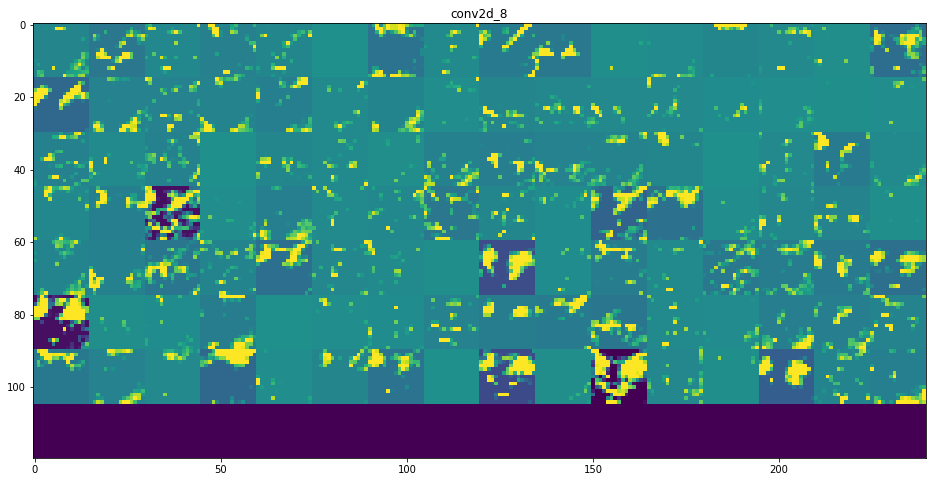

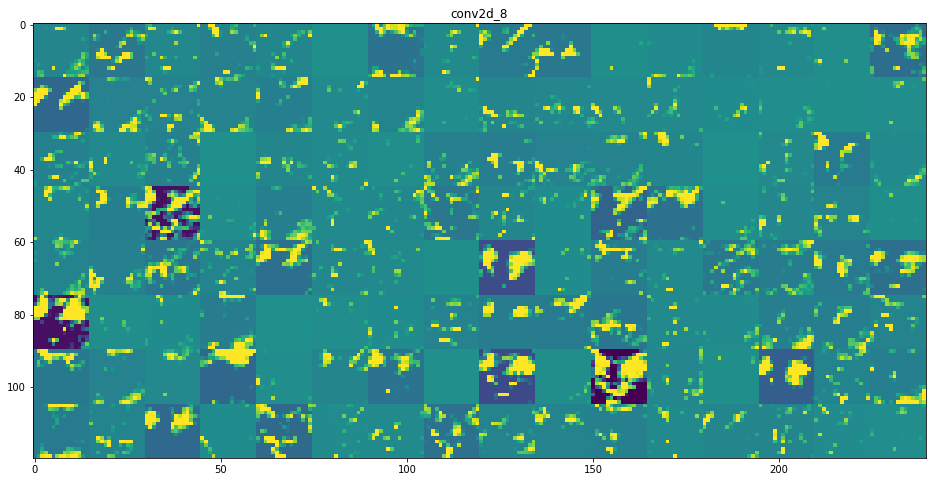

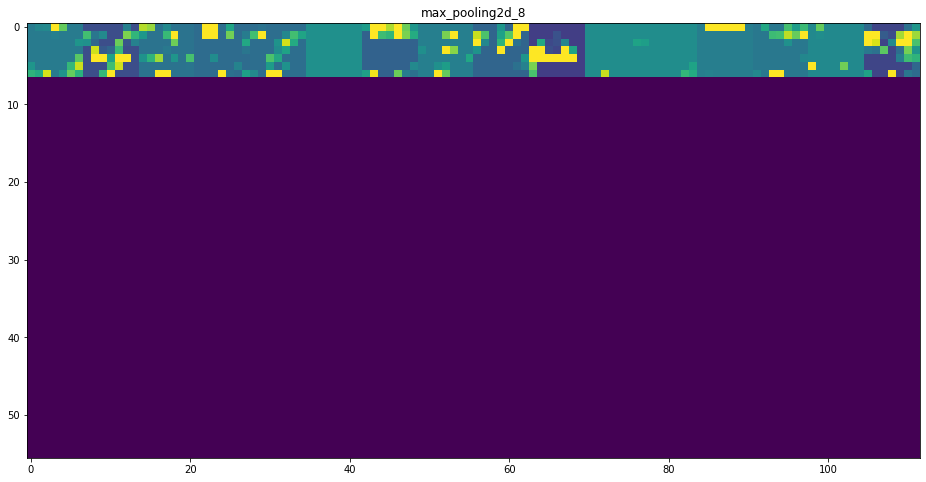

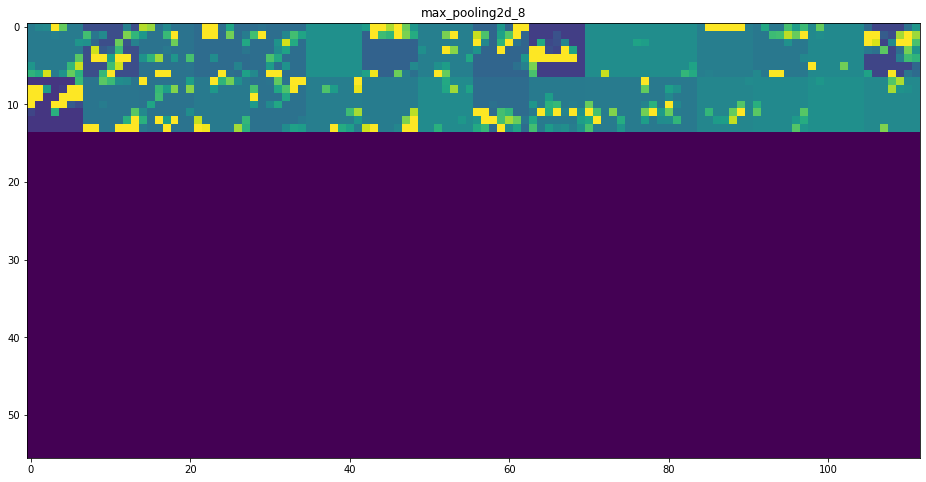

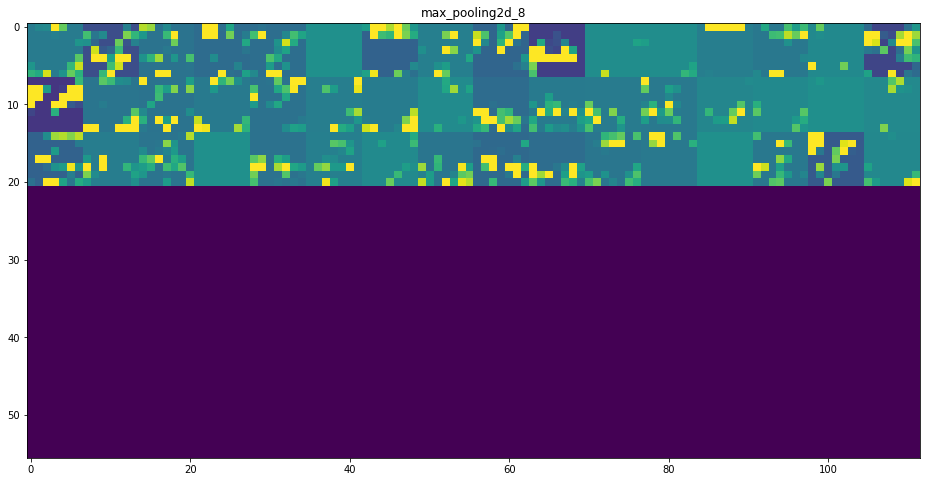

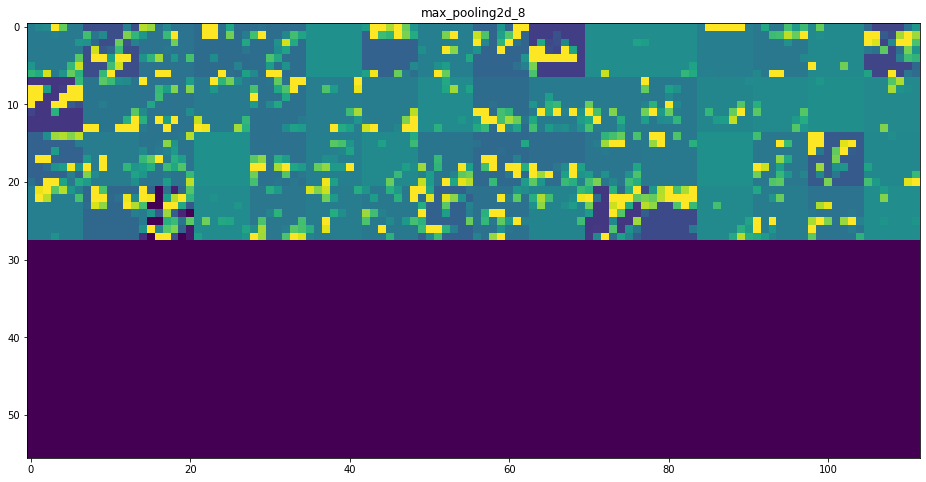

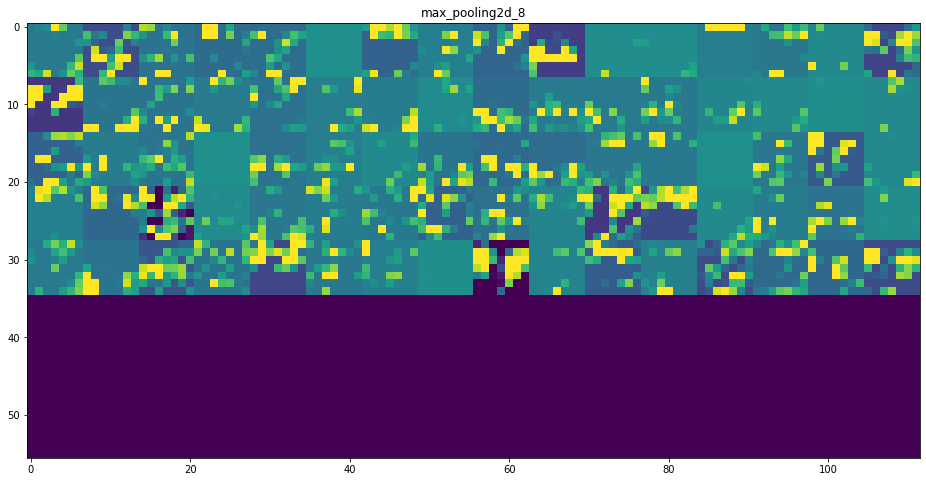

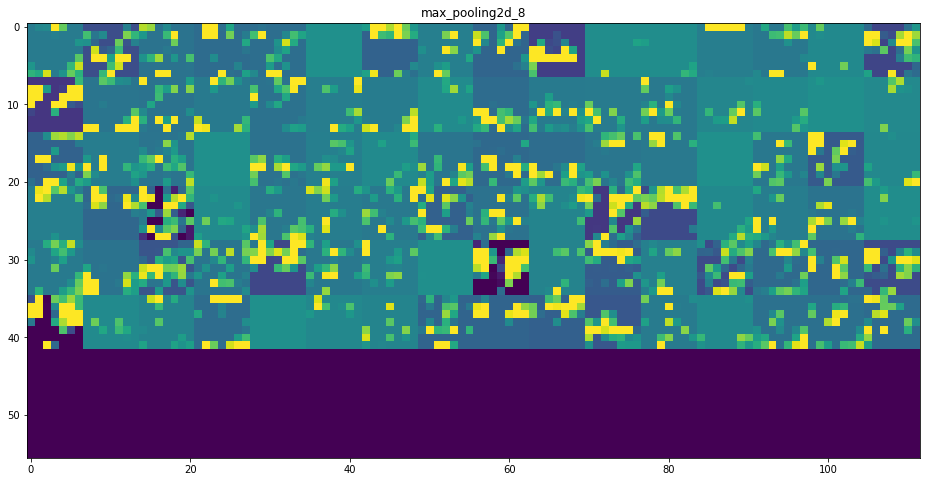

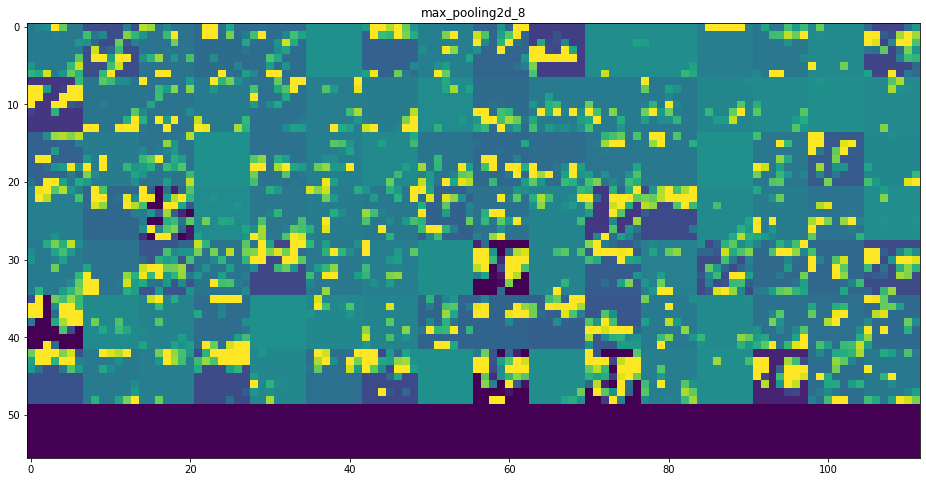

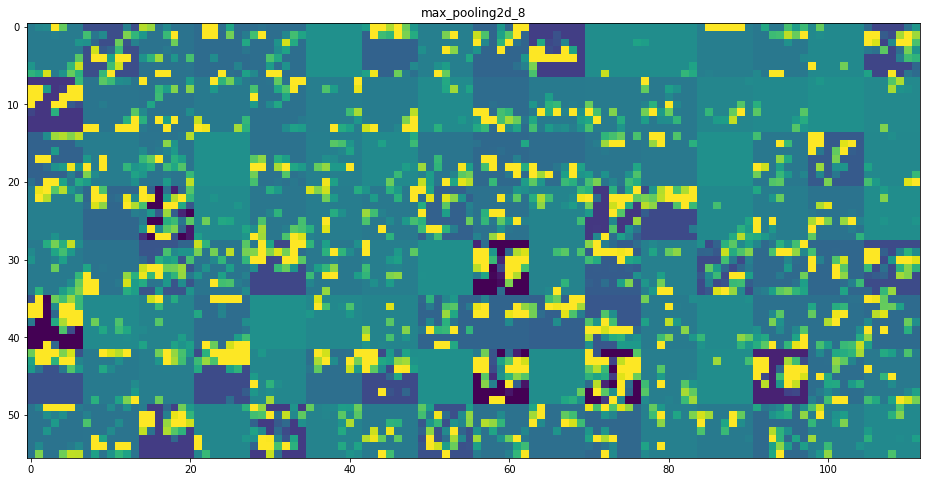

In [14]:
# 중간층의 모든 활성화에 있는 채널 시각화하기

layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)  # 층의 이름을 그래프 제목으로 사용
    
images_per_row = 16

# 특성 맵을 그림
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # 특성 맵에 있는 특성의 수
    
    size = layer_activation.shape[1]  # 특성 맵의 크기=(1, size, size, n_features)=(1, 148, 148, 32)
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))  # (148*2, 16*148)
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

### 시각화된 특성 맵 해석

* 상위 층으로 갈수록 활성화는 점점 더 추상적이게 되고, 시각적으로 이해하기 어려워진다.
    * 고수준 개념 인코딩: ex) 고양이 귀, 고양이 눈
    * 이미지의 시각적 콘텐츠에 관한 정보가 점점 줄어들고, 이미지의 클래스(타깃 - 강아지/고양이)에 관한 정보가 점점 증가
* 층이 깊어질수록 비어 있는 활성화가 늘어난다.
    * 필터에 인코딩된 패턴이 입력 이미지에 나타나지 않았다는 것을 의미
* 심층 신경망은, 입력되는 원본 데이터에 대한 정보 정체 파이프라인처럼 작동한다.
    * 반복적인 변환을 통해, 관계없는 정보를 걸러내고 유용한 정보는 강조되고 개선됨
* 사람과 동물이 세상을 인지하는 방식과 비슷하다.
    * 우리 뇌는 시각적 입력에서 관련성이 적은 요소를 필터링하여 고수준 개념으로 변환한다.

## 2) 컨브넷 필터 시각화하기

* **각 필터가 반응하는 시각적 패턴**을 그려본다.
* 컨브넷 입력 이미지에 **경사 상승법**을 적용해, 빈 입력 이미지에서 시작해 특정 필터의 응답을 최대화한다.
* 경사 상승법
    * 손실 함수의 값이 커지는 방향으로 그래디언트를 업데이트함 => 경사 하강법과는 반대
    * 학습 과정은 경사 하강법과 동일함

### 과정

1. 특정 합성곱 층의 한 필터 값을 최대화하는 손실 함수를 정의한다.

2. 이 활성화 값을 최대화하기 위해 입력 이미지를 변경하도록 확률적 경사 상승법을 사용한다.

In [15]:
# 필터 시각화를 위한 손실 텐서 정의하기

# VGG16 네트워크에서 block3_conv1 층 필터 0번의 활성화를 손실로 정의함

from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [16]:
# 입력에 대한 손실의 그래디언트 구하기

grads = K.gradients(loss, model.input)[0]

In [17]:
# 그래디언트 정규화하기

# gradient clipping 적용
# : gradient 텐서를 L2 norm(텐서에 있는 값을 제곱한 합의 제곱근) 으로 나누어 정규화하는 것
# => 입력 이미지에 적용할 수정량의 크기를 항상 일정 범위 안에 놓을 수 있음
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)  # 0으로 나눠지는 것을 방지하기 위해 1e-5를 더함

In [18]:
# 입력 값에 대한 넘파이 출력 값 추출하기

iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [19]:
# 확률적 경사 상승법을 사용해 손실 최대화하기

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.  # noise가 섞인 회색 이미지로 시작

step = 1. ## 업데이트할 그래디언트의 크기
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step  # 손실을 최대화하는 방향으로 입력 이미지를 수정

In [20]:
# 결과 이미지 텐서: (1, 150, 150, 3) 크기의 부동 소수 텐서
# 출력 가능한 이미지([0, 255] 사이의 값)로 변경하기 위해 후처리

# 텐서를 이미지 형태로 변환하기 위한 유틸리티 함수

def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # [0, 1]로 클리핑
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # RGB 배열로 변환
    x *= 255
    x = np.clip(x, 0, 255).astype('unit8')
    return x